In [ ]:
import io
from google.colab import files
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture #EM
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from scipy import stats
import matplotlib.pyplot as plt

### **Lendo a base de dados**

In [ ]:
uploaded = files.upload()

Saving BaseReduzida1-NormBinary.csv to BaseReduzida1-NormBinary.csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['BaseReduzida1-NormBinary.csv']))


In [ ]:
dataset = pd.read_csv('BaseReduzida1-NormBinary.csv')

In [ ]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,0.0,0.0,0.679487,0.0,0.495054,1.0,1.0,1.0,1.0,1.0,0.8,1.00,0.6,0.6,0.6,0.5,0.50,0.6,0.6,0.003257,0.0,1.0,0.0,0.0
1,0.0,0.0,0.679487,0.0,0.394385,0.6,0.6,0.6,0.6,0.6,0.8,0.75,1.0,1.0,1.0,1.0,0.75,1.0,0.6,0.001086,0.0,1.0,0.0,0.0
2,1.0,0.0,0.282051,1.0,0.192610,0.4,0.8,0.4,0.2,0.6,0.4,0.50,0.6,1.0,1.0,1.0,0.50,1.0,0.6,0.000000,0.0,0.0,1.0,0.0
3,1.0,0.0,0.410256,1.0,0.299389,0.6,0.8,0.6,0.6,1.0,0.6,1.00,1.0,1.0,0.6,1.0,1.00,0.8,1.0,0.000000,0.0,0.0,1.0,0.0
4,0.0,0.0,0.423077,0.0,0.371836,0.2,0.2,0.2,0.2,0.6,0.8,0.75,1.0,1.0,1.0,1.0,0.50,1.0,1.0,0.011944,0.0,1.0,0.0,0.0


### **K-means**

Serão feitos experimentos com k variando de 2 até 20. Por ser um método com inicialização, para cada valor de k, serão feitas 5 execuções (variando o valor da seed). Após os experimentos, serão calculados os índices DB e Silhouette de todos as partições geradas (agrupamentos construídos). Uma vez calculados os índices DB e Silhouette, a média e o desvio padrão por valor de k são calculados para cada índice. Coloque os resultados em um gráfico (modelo acima) para cada índice, onde o eixo x representa o valor de k, e o eixo y representa o respectivo índice. Para o DB, defina como o número de grupos mais adequado o que tiver o MENOR índice DB. O comportamento inverso é esperado para o Silhouette, quanto maior, melhor para a partição. Também defina o melhor número de grupos para o Silhouette. 


In [ ]:
media_dbk = []
media_slck = []
std_dbk = []
std_slck = []

for k in range (2, 21):
  indices_dbk = []
  indices_slck = []

  for i in range(5):
    seed = random.randint(900,5000)
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=seed)
    km.fit(dataset)
    km.fit_predict(dataset)
    labels = km.labels_
    dbk = davies_bouldin_score(dataset, labels)
    slck = silhouette_score(dataset, labels)
    indices_dbk.append(dbk)
    indices_slck.append(slck)

  media_dbk.append(np.mean(indices_dbk))
  media_slck.append(np.mean(indices_slck))
  std_dbk.append(np.std(indices_dbk))
  std_slck.append(np.std(indices_slck))

  print('K =', k)
  print(indices_dbk)
  print(indices_slck)


K = 2
[1.8069422441343743, 1.8069422441343743, 1.8068876516836465, 1.8069422441343743, 1.8069422441343743]
[0.2220120634032327, 0.2220120634032327, 0.22200523800337485, 0.2220120634032327, 0.2220120634032327]
K = 3
[2.074372279880612, 2.074372279880612, 2.074372279880612, 2.074372279880612, 2.074372279880612]
[0.21293750360980904, 0.21293750360980904, 0.21293750360980904, 0.21293750360980904, 0.21293750360980904]
K = 4
[2.1809685576368807, 2.181024243005303, 2.181024243005303, 2.1809685576368807, 2.180892179183461]
[0.16690841946211563, 0.1669015697280436, 0.1669015697280436, 0.16690841946211563, 0.16691534821750392]
K = 5
[2.0136455424107655, 2.013645542410766, 2.10420504455481, 2.0136455424107655, 2.0136455424107655]
[0.1790161662872462, 0.1790161662872462, 0.1624525658726538, 0.1790161662872462, 0.1790161662872462]
K = 6
[1.952295291039322, 1.8992544127927784, 1.9619569016877234, 1.9613734740012194, 1.9523134170858614]
[0.17121925585683137, 0.1676676577041094, 0.15457434437413684, 0

In [ ]:
print(media_dbk)
print(media_slck)

[1.8069313256442285, 2.074372279880612, 2.1809755560935655, 2.0317574428395746, 1.945438699321381, 1.9103229324630326, 1.9058286571468877, 1.862290115459277, 1.7952642302722635, 1.7821569089780867, 1.77324564326792, 1.805606049356287, 1.781512443395752, 1.813307666137558, 1.817526084054982, 1.8572091656770315, 1.8646188170263502, 1.9012329726681838, 1.8923032763203866]
[0.22201069832326117, 0.21293750360980904, 0.16690706531956448, 0.17570344620432773, 0.16384122282671326, 0.16337369909657237, 0.161051032801203, 0.16332113354562364, 0.15748785421905803, 0.1596718049052977, 0.15789936149784406, 0.15401122726360317, 0.15558348820842616, 0.15435797706764828, 0.15702028485181696, 0.16151515033549774, 0.16213137693908553, 0.160246338561094, 0.1590738908564479]


In [ ]:
print(std_dbk)
print(std_slck)

[2.1836980291123353e-05, 0.0, 4.8560264990113276e-05, 0.03622380085761772, 0.023469260618930985, 0.09299087258184513, 0.09313114073288987, 0.018531005472046988, 0.046939556595625855, 0.019153134360986257, 0.013651022885954024, 0.048390578615214994, 0.013699322840514394, 0.027950441022628485, 0.047201673315066105, 0.04895375299393361, 0.04171780890995852, 0.0673862421880716, 0.0476960702410246]
[2.7301599431428515e-06, 0.0, 5.151249454291035e-06, 0.006625440165836959, 0.007691540260103012, 0.005903357531431665, 0.009479427779301764, 0.008668935069455319, 0.004434103068771621, 0.0046920397515741044, 0.004831621616918828, 0.004300181629174682, 0.004276143435967593, 0.004728700866974285, 0.0025346668484249562, 0.004358761703167429, 0.0027519193514137785, 0.004873800201452746, 0.0036810365124470864]


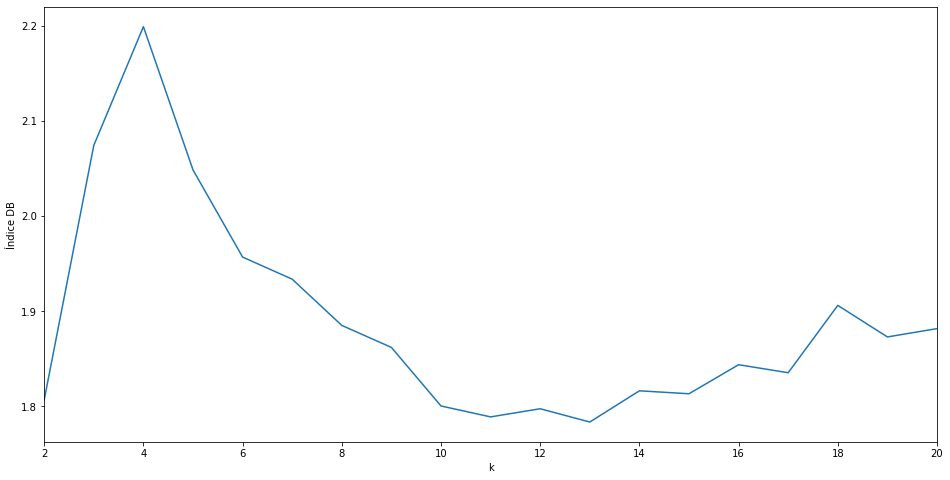

In [ ]:
K = range(2, 21)
plt.figure(figsize=(16,8))
plt.plot(K, media_dbk)
plt.xlim([2, 20])
plt.xlabel('k')
plt.ylabel('Índice DB')
plt.show()

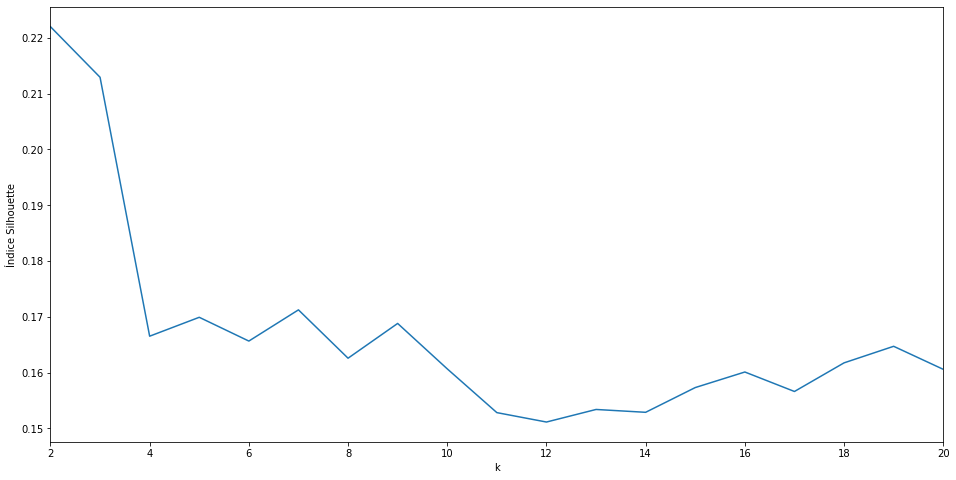

In [ ]:
K = range(2, 21)
plt.figure(figsize=(16,8))
plt.plot(K, media_slck)
plt.xlim([2, 20])
plt.xlabel('k')
plt.ylabel('Índice Silhouette')
plt.show()

### **Hierárquico aglomerativo**

Assim como no k-médias, serão feitos experimentos com o número de grupos variando de 2 até 20. Como este é um algoritmo determinístico, é necessário fazer apenas uma execução do algoritmo por valor de k, calculando na sequência os mesmos índices discutidos anteriormente. Além disso, crie os mesmos gráficos mostrados na seção 2.1.1, e por fim, defina qual o melhor número de grupos para os dois índices. Para o DB, defina como o número de grupos mais adequado o que tiver o MENOR índice DB. O comportamento inverso é esperado para o Silhouette, quanto maior, melhor para a partição. Também defina o melhor número de grupos para o Silhouette.

In [ ]:
indices_dbhier = []
indices_slchier = []

for k in range (2, 21):
  ahc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
  ahc.fit(dataset)
  ahc.fit_predict(dataset)
  labels = ahc.labels_
  dbhier = davies_bouldin_score(dataset, labels)
  slchier = silhouette_score(dataset, labels)
  indices_dbhier.append(dbhier)
  indices_slchier.append(slchier)

In [ ]:
print(dbhier)
print(slchier)

2.423059350418261
0.07661683080510337


In [ ]:
print(indices_dbhier)
print(indices_slchier)

[1.8131873695938636, 1.8034478817378712, 1.9134163891105322, 2.6784976486753074, 2.6171975541882366, 2.5115967398077106, 2.554500982754218, 2.564908878187698, 2.502099836272975, 2.4373644171431526, 2.5231171015486065, 2.4892131477053456, 2.493408410152377, 2.501134984556841, 2.54778167212777, 2.5224647902477026, 2.4433699916734475, 2.4447478608749047, 2.423059350418261]
[0.22110378647482704, 0.23219618181344867, 0.2153341050342178, 0.13431658724626463, 0.11858124415525481, 0.11164047998551203, 0.10490185569927192, 0.10695350905241577, 0.10014001054212235, 0.1029244638217535, 0.0899624599063556, 0.08780847275756877, 0.08488254606117197, 0.08475352926687635, 0.08026615224928206, 0.08691021282668179, 0.0835808842487595, 0.07686246908153486, 0.07661683080510337]


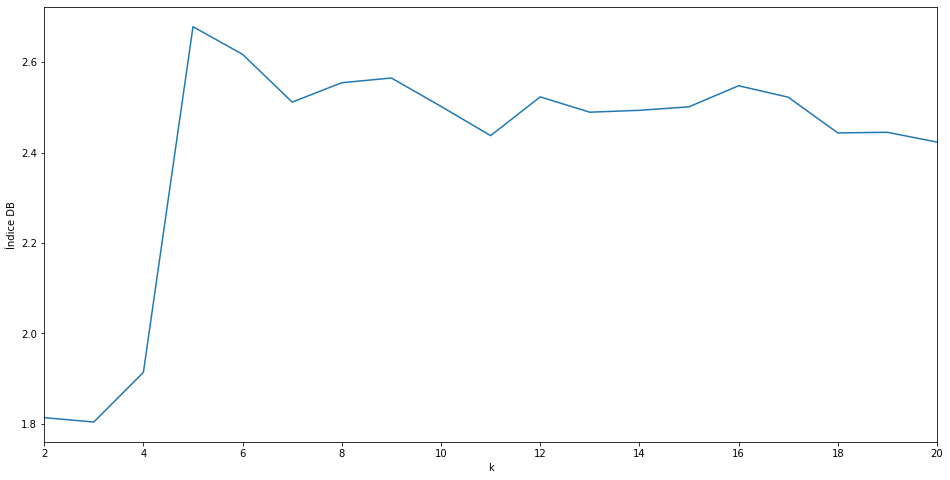

In [ ]:
K = range(2, 21)
plt.figure(figsize=(16,8))
plt.plot(K, indices_dbhier)
plt.xlim([2, 20])
plt.xlabel('k')
plt.ylabel('Índice DB')
plt.show()

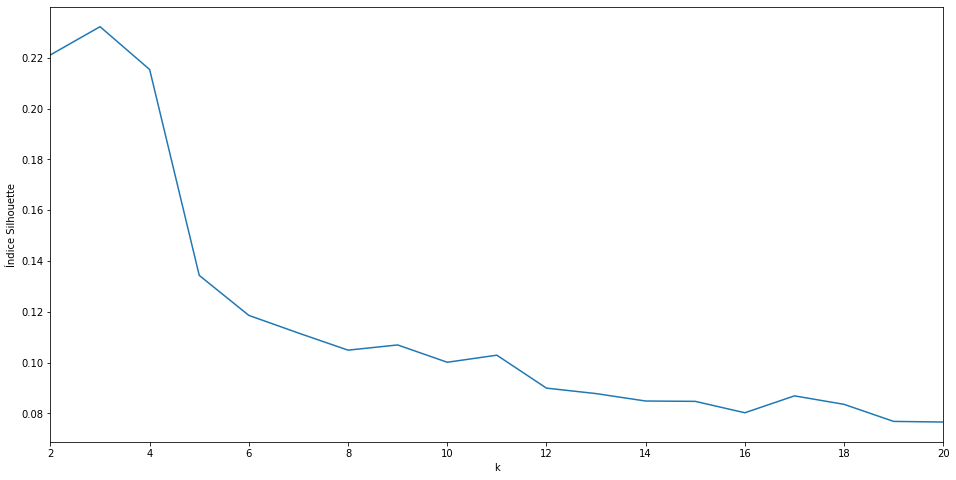

In [ ]:
K = range(2, 21)
plt.figure(figsize=(16,8))
plt.plot(K, indices_slchier)
plt.xlim([2, 20])
plt.xlabel('k')
plt.ylabel('Índice Silhouette')
plt.show()

Para ambos índices, o valor de k é 3.

### **Expectation Maximization (EM)**

Serão feitos experimentos com k variando de 2 até 20. Por ser um método com inicialização, para cada valor de k, serão feitas 5 execuções (variando o valor da seed). Após os experimentos, serão calculados os dois índices para todas as partições geradas (agrupamentos construídos). Uma vez calculado os índices, a média e o desvio padrão por valor de k são calculados para cada índice. Coloque os resultados em um gráfico para cada índice, onde o eixo x representa o valor de k, e o eixo y representa o respectivo índice.

In [ ]:
media_dbem = []
media_slcem = []
std_dbem = []
std_slcem = []

for k in range (2, 21):
  indices_dbem = []
  indices_slcem = []

  for i in range(5):
    seed = random.randint(900,5000)
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=seed)
    gmm.fit(dataset)
    gmm.fit_predict(dataset)
    labels = gmm.predict(dataset)
    dbem = davies_bouldin_score(dataset, labels)
    slcem = silhouette_score(dataset, labels)
    indices_dbem.append(dbem)
    indices_slcem.append(slcem)

  media_dbem.append(np.mean(indices_dbem))
  media_slcem.append(np.mean(indices_slcem))
  std_dbem.append(np.std(indices_dbem))
  std_slcem.append(np.std(indices_slcem))

  print('K =', k)
  print(indices_dbem)
  print(indices_slcem)

K = 2
[1.8054340036304923, 1.8054340036304923, 1.8054340036304923, 1.8054340036304923, 1.8054340036304923]
[0.22171681425085304, 0.22171681425085304, 0.22171681425085304, 0.22171681425085304, 0.22171681425085304]
K = 3
[1.8001021236187853, 2.085946151601234, 2.2575001814639672, 2.085946151601234, 2.085946151601234]
[0.23603487414243735, 0.21302369718740619, 0.19186167122407705, 0.21302369718740619, 0.21302369718740619]
K = 4
[2.627440496238281, 3.1239000704230775, 2.194223707432595, 2.627440496238281, 2.627440496238281]
[0.16883161240323674, 0.12464804351954725, 0.16532124504250018, 0.16883161240323674, 0.16883161240323674]
K = 5
[2.1389909099829545, 2.7611379393379254, 2.0136747849541545, 2.8725300141648598, 2.7611379393379254]
[0.1629888187500213, 0.13781187910162182, 0.17900888963987294, 0.14150880499431487, 0.13781187910162182]
K = 6
[2.501874733231719, 2.6618435435878998, 2.27112075060143, 3.1790140613282456, 2.0274976664143343]
[0.1567287178682707, 0.13138902653825782, 0.15293395

In [ ]:
print(media_dbem)
print(media_slcem)

[1.8054340036304921, 2.063088151977291, 2.640089053314103, 2.5094943175555633, 2.528270151032726, 2.6763216130959004, 2.9298150247231383, 3.551119775692347, 3.338360874145426, 3.3937848454854, 3.5038984029008704, 4.028957432029824, 4.049640298360682, 3.6122002368344424, 4.531047901430798, 4.672338714291048, 5.019130660876106, 4.969135382270364, 5.542451536451374]
[0.22171681425085304, 0.21339352738574657, 0.15929282515435156, 0.15182605431749055, 0.1413039429093184, 0.13486308660116486, 0.14312480618518686, 0.11712130696553476, 0.12871238492556544, 0.11291231289799139, 0.12093521173361892, 0.09704464421461917, 0.09905679072071852, 0.10160510208220024, 0.09756960180416899, 0.0889491424674114, 0.08348920493348763, 0.0751621117855363, 0.07335252909724636]


In [ ]:
print(std_dbem)
print(std_slcem)

[2.220446049250313e-16, 0.14732627244407806, 0.29439733861648887, 0.35820489268352557, 0.38959083704813796, 0.24474165646756404, 0.32255075096584185, 1.119650166475447, 0.4281324416027068, 0.37066773675808795, 0.6309924710908892, 0.8176095169215052, 0.3316920694067473, 0.5912874862205356, 1.5448222040848758, 0.3389789814535978, 1.2597893128591262, 0.2729708259573988, 0.8499518935268687]
[0.0, 0.013976134915278625, 0.017375661871765247, 0.01650911077858914, 0.018205498184539697, 0.020209411174769515, 0.016943271630529385, 0.019941058078861533, 0.016665292245411804, 0.01963891684246538, 0.013599201048288911, 0.022180486132890292, 0.01721535733805947, 0.021942996746535614, 0.0236698600984078, 0.0098955048045538, 0.023720589557516707, 0.012767863302040305, 0.01669349536588422]


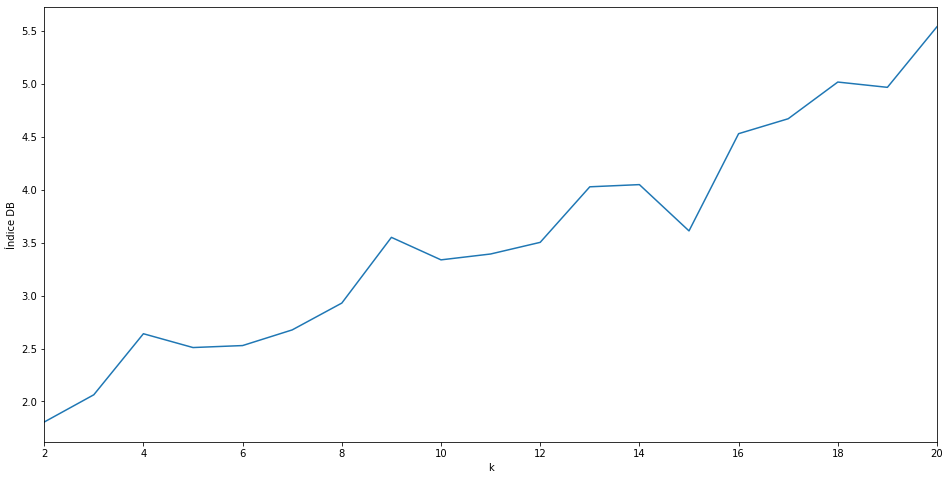

In [ ]:
K = range(2, 21)
plt.figure(figsize=(16,8))
plt.plot(K, media_dbem)
plt.xlim([2, 20])
plt.xlabel('k')
plt.ylabel('Índice DB')
plt.show()

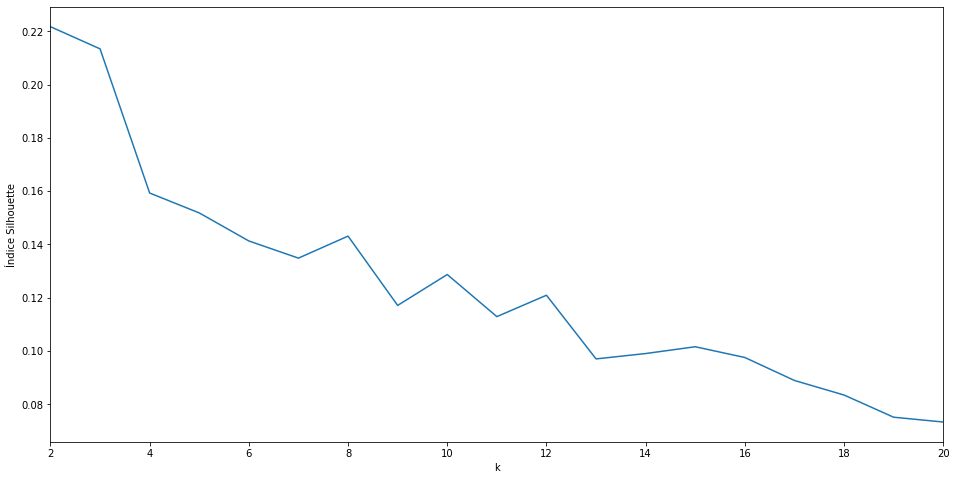

In [ ]:
K = range(2, 21)
plt.figure(figsize=(16,8))
plt.plot(K, media_slcem)
plt.xlim([2, 20])
plt.xlabel('k')
plt.ylabel('Índice Silhouette')
plt.show()

###Testes Estatísticos

**Friedman**

In [ ]:
from scipy import stats
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [ ]:
#perform Friedman Test
stat, p = friedmanchisquare(media_dbk, indices_dbhier, media_dbem)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=22.211, p=0.000


**Wilcoxon**

In [ ]:
stat2, p2 = wilcoxon(media_dbk, indices_dbhier)
print('Statistics=%.3f, p=%.5f' % (stat2, p2))

Statistics=5.000, p=0.000


In [ ]:
stat3, p3 = wilcoxon(media_dbk, media_dbem)
print('Statistics=%.3f, p=%.3f' % (stat3, p3))

Statistics=3.000, p=0.000


In [ ]:
stat4, p4 = wilcoxon(indices_dbhier, media_dbem)
print('Statistics=%.3f, p=%.3f' % (stat4, p4))

Statistics=7.000, p=0.000
